In [1]:
from datetime import date
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import KFold
from statsmodels.tsa.stattools import acf, pacf
import bokeh
import sklearn
from itertools import product
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from bokeh.io import show, output_notebook
from bokeh.plotting import figure, show
from bokeh.transform import linear_cmap
from bokeh.palettes import Blues9
from bokeh.models import ColumnDataSource,ColorBar,Legend
import math
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

#display parent directory and working directory
print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd()+':', os.listdir(os.getcwd()));
output_notebook()

C:\Users: ['.anaconda2020', 'ADITEYA RAJ', 'All Users', 'Default', 'Default User', 'desktop.ini', 'Public']
C:\Users\ADITEYA RAJ: ['.anaconda', '.conda', '.condarc', '.config', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.spyder-py3', '3D Objects', 'aditeya', 'Anaconda3', 'AppData', 'Application Data', 'Assignment_Aditeya Raj-Copy1.ipynb', 'Assignment_Aditeya Raj.ipynb', 'Contacts', 'Cookies', 'Desktop', 'Documents', 'Downloads', 'emp.csv', 'Favorites', 'Google Drive', 'IntelGraphicsProfiles', 'Links', 'Local Settings', 'MicrosoftEdgeBackups', 'Music', 'My Documents', 'NetHood', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{8a6a6bfb-0308-11ea-b7a2-cccf72480941}.TM.blf', 'NTUSER.DAT{8a6a6bfb-0308-11ea-b7a2-cccf72480941}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{8a6a6bfb-0308-11ea-b7a2-cccf72480941}.TMContainer00000000000000000002.regtrans-ms', 'NTUSER.DAT{dfec2047-b328-11ea-8059-00f48d2c65ac}.TM.blf', 'NTUSER.DAT{dfec2047-b328-11ea-805

Loading BokehJS ...

In [8]:

df1 = pd.read_csv('C:\\Users\\ADITEYA RAJ\\Desktop\\datasets\\prices-split-adjusted.csv')

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1762 entries, 0 to 1761
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1762 non-null   object 
 1   symbol  1762 non-null   object 
 2   open    1762 non-null   float64
 3   close   1762 non-null   float64
 4   low     1762 non-null   float64
 5   high    1762 non-null   float64
 6   volume  1762 non-null   float64
dtypes: float64(5), object(2)
memory usage: 96.5+ KB


In [10]:
df1.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,23.238655,23.246436,23.036771,23.447395,4.198613e+07
std,4.343675,4.353713,4.333605,4.362779,3.089350e+07
min,13.930000,13.730000,13.300000,14.120000,8.166300e+06
25%,19.840000,19.830000,19.662500,19.959999,2.536715e+07
50%,23.245000,23.245000,22.990000,23.500000,3.529625e+07
75%,26.927500,26.879999,26.655000,27.170000,5.017315e+07
max,31.930000,31.870001,31.750000,31.950001,5.600402e+08


In [11]:
df1.sort_index(axis=0)

,date,symbol,open,close,low,high,volume
0,2010-01-04,CSCO,24.110001,24.690001,24.010000,24.840000,59853700.0
1,2010-01-05,CSCO,24.600000,24.580000,24.379999,24.730000,45124500.0
2,2010-01-06,CSCO,24.540001,24.420000,24.340000,24.740000,35715700.0
3,2010-01-07,CSCO,24.299999,24.530001,24.170000,24.570000,31531200.0
4,2010-01-08,CSCO,24.379999,24.660000,24.250000,24.700001,39115900.0
...,...,...,...,...,...,...,...
1757,2016-12-23,CSCO,30.540001,30.530001,30.400000,30.600000,9167500.0
1758,2016-12-27,CSCO,30.639999,30.680000,30.600000,30.820000,14175500.0
1759,2016-12-28,CSCO,30.700001,30.420000,30.350000,30.770000,12022200.0
1760,2016-12-29,CSCO,30.370001,30.459999,30.330000,30.549999,10995600.0


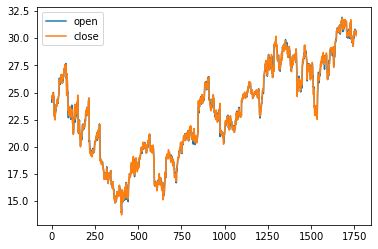

In [12]:
df1[[ 'open', 'close']].plot(secondary_y='symbol')

In [13]:
df=df1.loc[df1['symbol'] == 'CSCO']

In [14]:
df.sort_index(axis=0)

,date,symbol,open,close,low,high,volume
0,2010-01-04,CSCO,24.110001,24.690001,24.010000,24.840000,59853700.0
1,2010-01-05,CSCO,24.600000,24.580000,24.379999,24.730000,45124500.0
2,2010-01-06,CSCO,24.540001,24.420000,24.340000,24.740000,35715700.0
3,2010-01-07,CSCO,24.299999,24.530001,24.170000,24.570000,31531200.0
4,2010-01-08,CSCO,24.379999,24.660000,24.250000,24.700001,39115900.0
...,...,...,...,...,...,...,...
1757,2016-12-23,CSCO,30.540001,30.530001,30.400000,30.600000,9167500.0
1758,2016-12-27,CSCO,30.639999,30.680000,30.600000,30.820000,14175500.0
1759,2016-12-28,CSCO,30.700001,30.420000,30.350000,30.770000,12022200.0
1760,2016-12-29,CSCO,30.370001,30.459999,30.330000,30.549999,10995600.0


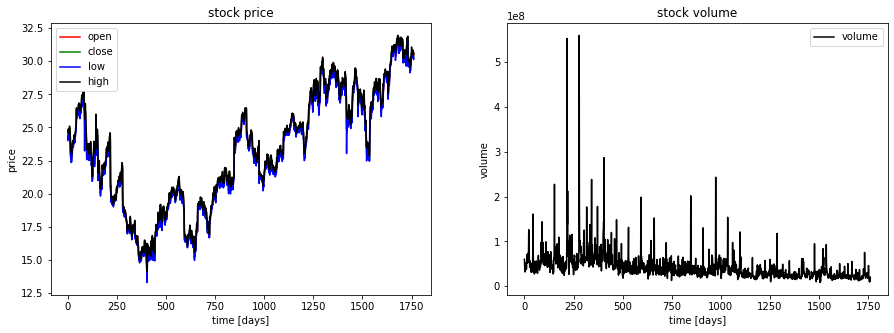

In [15]:
plt.figure(figsize=(15, 5));
plt.subplot(1,2,1);
plt.plot(df[df.symbol == 'CSCO'].open.values, color='red', label='open')
plt.plot(df[df.symbol == 'CSCO'].close.values, color='green', label='close')
plt.plot(df[df.symbol == 'CSCO'].low.values, color='blue', label='low')
plt.plot(df[df.symbol == 'CSCO'].high.values, color='black', label='high')
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(1,2,2);
plt.plot(df[df.symbol == 'CSCO'].volume.values, color='black', label='volume')
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

Text(0, 0.5, 'Price')

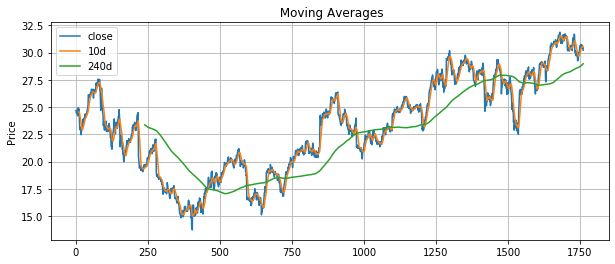

In [16]:
#Moving Average Technical Analysis
stockprices = pd.DataFrame.from_dict(df)
stockprices['10d'] = stockprices['close'].rolling(10).mean()
stockprices['240d'] = stockprices['close'].rolling(240).mean()
  
stockprices[['close','10d','240d']].plot(figsize=(10,4))
plt.grid(True)
plt.title(' Moving Averages')
plt.axis('tight')
plt.ylabel('Price')

In [225]:
from statsmodels.tsa.stattools import acf, pacf
import bokeh
from bokeh.io import show, output_notebook
from bokeh.plotting import figure, show
from bokeh.transform import linear_cmap
from bokeh.palettes import Blues9
from bokeh.models import ColumnDataSource,ColorBar,Legend
output_notebook()

Loading BokehJS ...

In [18]:
#Part 2 (data visualization ):
def timeseries_plot(data):
   
    p = figure(plot_width=1000, plot_height=500, toolbar_location="above", x_axis_type='datetime',
              title = 'Time Series Plots')
    
    #timeseries plot of close prices of stocks/indices in blue colour
    
    r0 = p.line(x = data.index, y = data['close'], color='blue')
    
    # timeseries between two volume shocks in a different color (Red)
    #Since the difference value is too big, in order to visualize all plots properly,
    #we are taking the percentage change of Volumes. 
    
    r1 = p.line(x = data.index, y = data['volume'].pct_change()*100, color='red')
        
    #Mark closing Pricing shock without volume shock to identify volumeless price movement
    #Since data["PriceShock_w/o_VolShock"] is either 0 or 1, multiplying it with data['Close'] to get the real value.
    
    
    legend  = Legend(items=[('Close prices of stocks/indices', [r0]),
                            ('Volume shocks' , [r1])
                            ],location=(0, -30))
    
    p.add_layout(legend, 'right')
    p.legend.click_policy="hide"
   
    show(p)

In [19]:
timeseries_plot(df)

In [20]:
def pacf_plot(data):
    
    p = figure(plot_width = 1000, plot_height=500,toolbar_location="above", x_range=[-3,90],
               title="Partial AutoCorrelation Plot With 90 Lags")

    y_pacf = pacf(data["close"], nlags=90)
    x = list(range(90))
    
    p.segment(x, 0, x, y_pacf, line_width=2, line_color="blue", )
    p.circle(x, y_pacf, size=8, fill_color="orange", line_color="blue", line_width = 3, )
    
    show(p)

In [22]:
pacf_plot(df)

In [23]:

X=(df.drop(['symbol','high','low','volume','open'], axis=1))
y=(df.drop(['symbol','high','low','volume','open','date'], axis=1))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42,shuffle=False)

In [25]:
X_test

,date,close,10d,240d
1409,2015-08-10,28.590000,28.294,27.325750
1410,2015-08-11,28.020000,28.275,27.339167
1411,2015-08-12,27.900000,28.225,27.351875
1412,2015-08-13,28.700001,28.265,27.367333
1413,2015-08-14,29.030001,28.326,27.384625
...,...,...,...,...
1757,2016-12-23,30.530001,30.516,28.871250
1758,2016-12-27,30.680000,30.567,28.896333
1759,2016-12-28,30.420000,30.550,28.924667
1760,2016-12-29,30.459999,30.550,28.952208


In [26]:
ps = range(0, 3)
d=1
qs = range(0, 1)
Ps = range(0, 3)
D=1
Qs = range(0, 3)


In [27]:
parameters =product(ps,qs,Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)
import statsmodels.api as sm

In [28]:
%%time
results = []
best_aic = float("inf")

warnings.filterwarnings('ignore')

for param in parameters_list:
    #try except is needed because some parameter combinations are not valid
    try:
        model=sm.tsa.statespace.SARIMAX(X_train['close'], order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, 
                                                        param[3], 10)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    # save best model, it's AIC and params
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

Wall time: 4min 36s


In [29]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

      parameters          aic
1   (0, 0, 0, 1)  1161.000839
5   (0, 0, 1, 2)  1161.539882
10  (1, 0, 0, 1)  1162.595275
8   (0, 0, 2, 2)  1162.937066
2   (0, 0, 0, 2)  1162.967470


In [30]:
print(best_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                close   No. Observations:                 1409
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 10)   Log Likelihood                -578.500
Date:                              Mon, 22 Jun 2020   AIC                           1161.001
Time:                                      09:11:46   BIC                           1171.486
Sample:                                           0   HQIC                          1164.921
                                             - 1409                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L10      -0.9996      0.395     -2.529      0.011      -1.774      -0.225
sigma2         0.12

In [32]:
X_train['model'] = best_model.fittedvalues

C:\Users\ADITEYA RAJ\Anaconda3\Anaconda3 2020.02\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(X_train['close'],X_train['model'])))


0.8173660398657383


In [34]:
X_test['forecast1'] = best_model.predict(start=X_test.index[0],end=X_test.index[-1])
X_test

C:\Users\ADITEYA RAJ\Anaconda3\Anaconda3 2020.02\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,close,10d,240d,forecast1
1409,2015-08-10,28.590000,28.294,27.325750,28.162292
1410,2015-08-11,28.020000,28.275,27.339167,28.150499
1411,2015-08-12,27.900000,28.225,27.351875,28.133637
1412,2015-08-13,28.700001,28.265,27.367333,28.147194
1413,2015-08-14,29.030001,28.326,27.384625,28.128972
...,...,...,...,...,...
1757,2016-12-23,30.530001,30.516,28.871250,29.025240
1758,2016-12-27,30.680000,30.567,28.896333,29.010295
1759,2016-12-28,30.420000,30.550,28.924667,29.022587
1760,2016-12-29,30.459999,30.550,28.952208,29.010794
